Intensity vs Fermi Chopper frequency

Just try the original parameters

In [2]:
cd ~/dv/sns-chops/resolution/CNCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/PyChop


In [3]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [4]:
from mcni.utils import conversion as C

In [5]:
%matplotlib notebook

# Exp data

In [6]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [7]:
# ls ..

In [55]:
ls -tl {Vdata2018.datadir}/*.dat

-rw-r--r-- 1 lj7 users  7096 Jun 25 21:00 /SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes_E500bins.dat
-rw-r--r-- 1 lj7 users  7096 Jun 25 20:46 /SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighFlux.dat
-rw-r--r-- 1 lj7 users  6264 Jun 21 09:27 /SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_Intermediate.dat
-rw-r--r-- 1 lj7 users  6209 Jun 21 09:27 /SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes_E1000bins.dat
-rw-r--r-- 1 lj7 users  6264 Jun 21 09:27 /SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_HighRes.dat
-rw-r--r-- 1 lj7 users 18939 Jun 21 09:27 /SNS/users/lj7/dv/sns-chops/resolution/CNCS/V_Cali_Int_Res_All.dat


In [59]:
expdata_highres = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighRes_E500bins.dat'))
expdata_interm = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_Intermediate.dat'))
expdata_highflux = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_HighFlux.dat'))

reading data. please wait...
  done
reading data. please wait...
  done
reading data. please wait...
  done


<IPython.core.display.Javascript object>


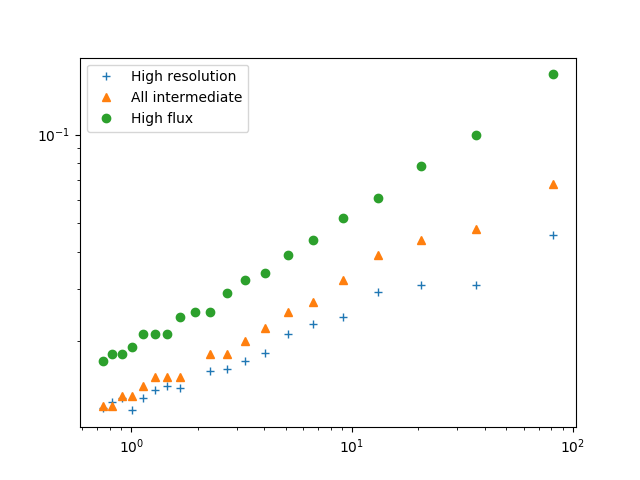

In [9]:
plt.figure()
plt.loglog(expdata_highres.Ei_list, expdata_highres.FWHM/np.array(expdata_highres.Ei_list), 
             '+', label='High resolution')
plt.loglog( expdata_interm.Ei_list, expdata_interm.FWHM/np.array(expdata_interm.Ei_list),
             '^', label='All intermediate')
plt.loglog(expdata_highflux.Ei_list, expdata_highflux.FWHM/np.array(expdata_highflux.Ei_list),
             'o', label='High flux')
plt.legend()

In [10]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

<IPython.core.display.Javascript object>


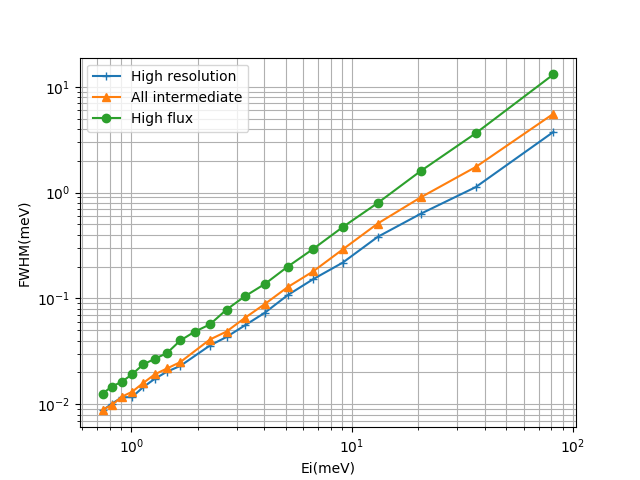

In [11]:
plt.figure()
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
plt.loglog(x,y, '+-', label='High resolution')
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
plt.loglog(x,y, '^-', label='All intermediate')
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.yticks
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

# Load Daniel's data

In [12]:
import sys
sys.path.insert(0, '/SNS/CNCS/shared/UsefulMantidScripts_2018')

In [13]:
import cncs

<IPython.core.display.Javascript object>


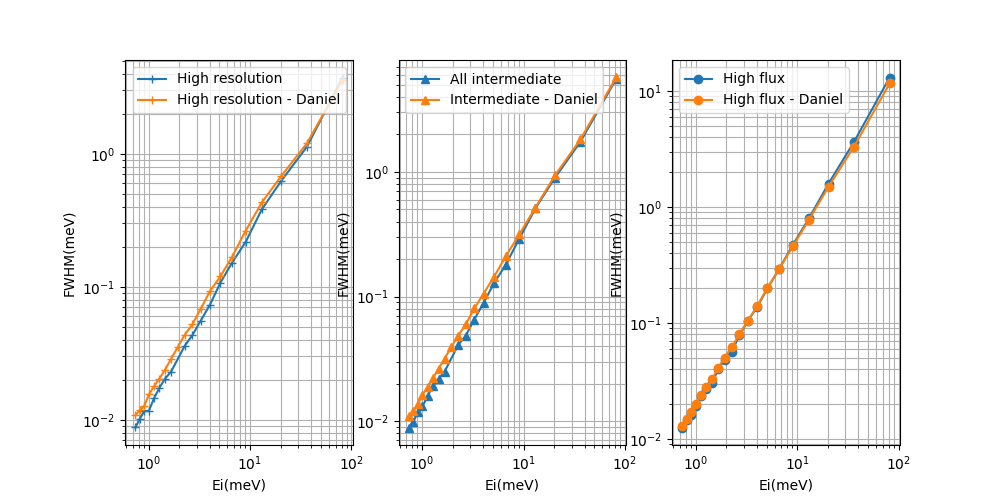

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
plt.loglog(x,y, '+-', label='High resolution')
plt.loglog(cncs.Ei_list_0, cncs.fwhm_list_0, '+-', label='High resolution - Daniel')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

plt.subplot(1,3,2)
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
plt.loglog(x,y, '^-', label='All intermediate')
plt.loglog(cncs.Ei_list_3, cncs.fwhm_list_3, '^-', label='Intermediate - Daniel')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

plt.subplot(1,3,3)
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.loglog(cncs.Ei_list_1, cncs.fwhm_list_1, 'o-', label='High flux - Daniel')

plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

<IPython.core.display.Javascript object>


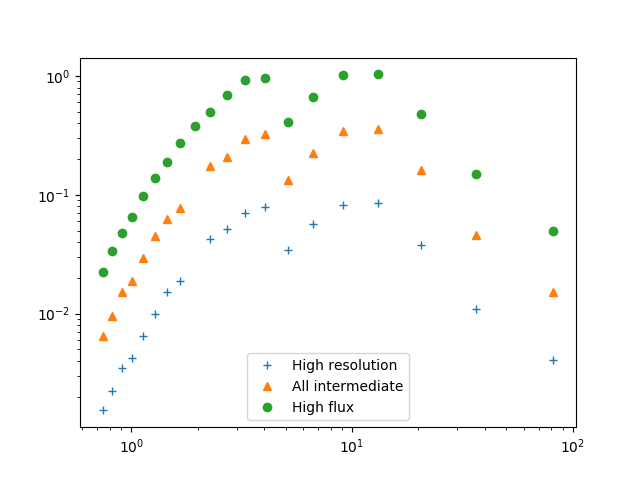

In [15]:
plt.figure()
plt.loglog(expdata_highres.Ei_list, expdata_highres.intensity, 
             '+', label='High resolution')
plt.loglog( expdata_interm.Ei_list, expdata_interm.intensity,
             '^', label='All intermediate')
plt.loglog(expdata_highflux.Ei_list, expdata_highflux.intensity,
             'o', label='High flux')
plt.legend()

# PyChop

In [16]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [17]:
from PyChop import PyChop2

In [18]:
from PyChop import Chop
reload(Chop)

<module 'PyChop.Chop' from '/SNS/users/lj7/dv/PyChop/Chop.pyc'>

In [19]:
import PyChop

In [20]:
instrument = PyChop2('cncs.yaml')
# instrument = PyChop2('cncs-v5.yaml')
# instrument = PyChop2('cncs-test.yaml')

In [21]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

## Resolution

<IPython.core.display.Javascript object>


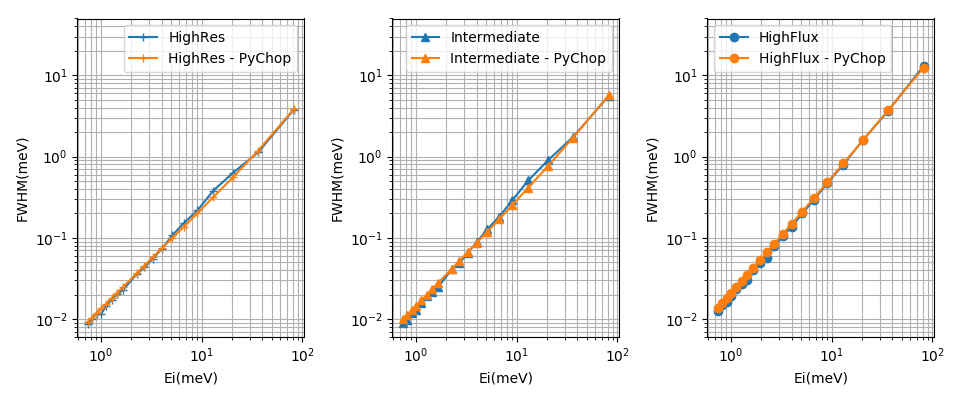

In [22]:
def decorate(ax):
    ax.grid(True, which='minor')
    ax.grid(True, which='major')
    ax.set_xlabel('Ei(meV)')
    ax.set_ylabel('FWHM(meV)')
    ax.legend()
    ax.set_ylim(6e-3, 5e1)
    return

fig, ax = plt.subplots(1, 3, figsize=(9.6,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
ax[0].loglog(x,y, '+-', label='HighRes')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
ax[0].loglog(x,y_pychop, '+-', label='HighRes - PyChop')
decorate(ax[0])

x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax[1].loglog(x,y, '^-', label='Intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=240.)[0][0] for _ in x]
ax[1].loglog(x,y_pychop, '^-', label='Intermediate - PyChop')
decorate(ax[1])

x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax[2].loglog(x,y, 'o-', label='HighFlux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax[2].loglog(x,y_pychop, 'o-', label='HighFlux - PyChop')
decorate(ax[2])

plt.tight_layout()

<IPython.core.display.Javascript object>


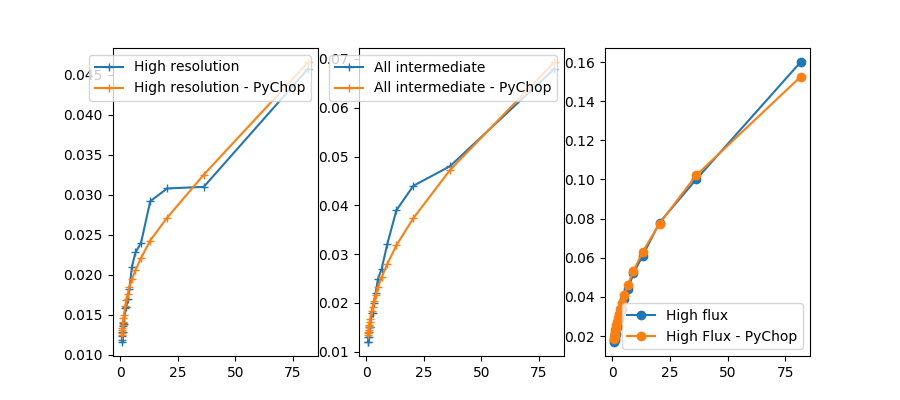

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(9,4))

ax = axes[0]
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
# ax.loglog(x,y, '+-', label='High resolution')
ax.plot(x, y/x, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
# ax.loglog(x,y_pychop, '+-', label='High resolution - PyChop')
ax.plot(x, y_pychop/x, '+-', label='High resolution - PyChop')
ax.legend()


ax = axes[1]
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax.plot(x, y/x, '+-', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=240.)[0][0] for _ in x]
ax.plot(x, y_pychop/x, '+-', label='All intermediate - PyChop')
ax.legend()

ax = axes[2]
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax.plot(x,y/x, 'o-', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax.plot(x,y_pychop/x, 'o-', label='High Flux - PyChop')
ax.legend()

## Intensity

PV=n_mol RT
n_mol/V = P/RT
n/V = P/RT * 6.022e23
v = RT/P/6.022e23

In [24]:
v =  8.314*(300.)/(10*101325)/6.022e23 * 1e30  # AA^3
print 1/v
xs = 5333. # barn
v/xs  # cm

0.000244639222997


0.7664826481422232

In [25]:
mu_He3 = xs/v

In [26]:
mu_He3

1.3046609762448882

In [27]:
from mcni.utils import conversion as Conv

In [28]:
pixelsize = 2.54 * .7
def deteff(E):
    v = Conv.e2v(E)
    return 1.-np.exp(-2200./v*mu_He3*pixelsize)

In [29]:
a = 3.03 # AA
xs = 5 # barn
mu_V = xs/a**3  # 1./cm

In [30]:
V_thickness = .9 #cm
def absorption(E):
    v = Conv.e2v(E)
    return np.exp(-2200./v*V_thickness*mu_V)

In [32]:
barn = 1e-28 # m^2
V_xs = 5.1 * barn
V_a = 3.03e-10 # m
V_scattering_length = V_a**3/V_xs
print V_scattering_length

0.0545453470588


In [37]:
duration = 2330 # seconds. roughtly

In [39]:
V_sample_thickness = 2e-3 
V_scattering_fraction = V_sample_thickness/V_scattering_length
print V_scattering_fraction
V_sample_xs = 6.3 * 1  # cm^2
source_power = 1.4

0.0366667389217


In [41]:
cncs_det_coverage_sr = 1.7
exp_int_to_flux = (4*np.pi/cncs_det_coverage_sr) / V_scattering_fraction / duration / V_sample_xs / source_power
print exp_int_to_flux

0.00980989028559


In [57]:
expdata_highres.vdata

,#,RunNumber,Energy,Ei,Chopper1,Chopper2,Chopper3,Chopper41,Chopper42,Height,FWHM,Sigma,Q,counts
0,0.0,274528.0,0.817451,0.817451,60.0,60.0,60.0,180.0,180.0,0.233246,0.010463,0.004443,0.474735,206717.0
1,0.0,274529.0,0.741452,0.741452,60.0,60.0,60.0,180.0,180.0,0.186467,0.009342,0.003967,0.452129,170425.0
2,0.0,274510.0,81.745120,81.745120,60.0,60.0,60.0,180.0,180.0,0.001020,3.629483,1.541182,4.747354,218268.0
3,0.0,274511.0,36.331164,36.331164,60.0,60.0,60.0,180.0,180.0,0.009085,0.988208,0.419621,3.164903,531180.0
4,0.0,274512.0,20.436280,20.436280,60.0,60.0,60.0,180.0,180.0,0.056397,0.555867,0.236037,2.373677,1693792.0
5,0.0,274513.0,13.079219,13.079219,60.0,60.0,60.0,180.0,180.0,0.207034,0.329596,0.139956,1.898942,3590645.0
6,0.0,274514.0,9.082791,9.082791,60.0,60.0,60.0,180.0,180.0,0.351784,0.225253,0.095649,1.582451,3686291.0
7,0.0,274515.0,6.673071,6.673071,60.0,60.0,60.0,180.0,180.0,0.366745,0.112108,0.047604,1.356387,2852235.0
8,0.0,274516.0,5.109070,5.109070,60.0,60.0,60.0,180.0,180.0,0.307993,0.116487,0.049464,1.186839,1792566.0
9,0.0,274517.0,4.036796,4.036796,60.0,60.0,60.0,180.0,180.0,1.007411,0.062167,0.026398,1.054968,3789201.0


In [70]:
scale_factor = 3e2

In [74]:
exp_int_to_flux

0.00980989028558523

<IPython.core.display.Javascript object>


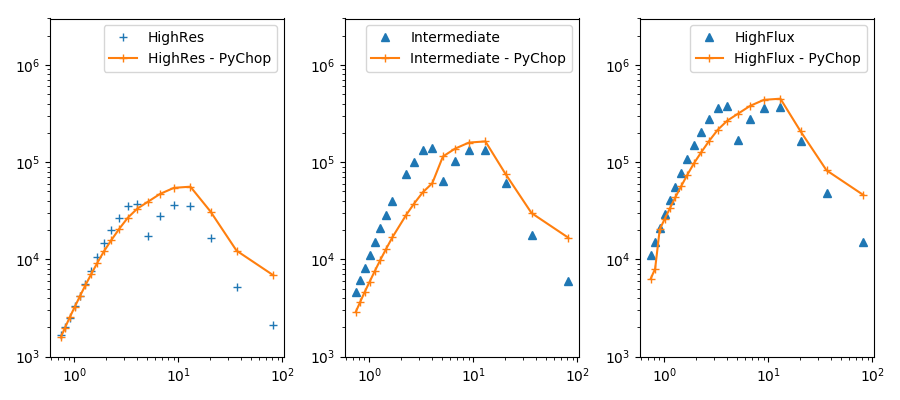

In [73]:
Imin, Imax = 1e3, 3e6

fig, ax = plt.subplots(1, 3, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.vdata.counts)
plt1 = ax[0]
plt1.loglog(x,y*exp_int_to_flux, '+', label='HighRes')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[1][0]*exp_int_to_flux*scale_factor*deteff(_)*absorption(_) 
            for _ in x]
plt1.loglog(x,y_pychop, '+-', label='HighRes - PyChop')
plt1.set_ylim(Imin, Imax)
plt1.legend()

plt1 = ax[1]
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.vdata.counts)
plt1.loglog( x,y*exp_int_to_flux, '^', label='Intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=240.)[1][0]*exp_int_to_flux*scale_factor*deteff(_)*absorption(_)
            for _ in x]
plt1.loglog(x,y_pychop, '+-', label='Intermediate - PyChop')
plt1.set_ylim(Imin, Imax)
plt1.legend()

plt1 = ax[2]
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.vdata.counts)
plt1.loglog( x,y*exp_int_to_flux, '^', label='HighFlux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=300.)[1][0]*exp_int_to_flux*scale_factor*deteff(_)*absorption(_)
            for _ in x]
plt1.loglog(x,y_pychop, '+-', label='HighFlux - PyChop')
plt1.set_ylim(Imin, Imax)
plt1.legend()

plt.tight_layout()

<IPython.core.display.Javascript object>


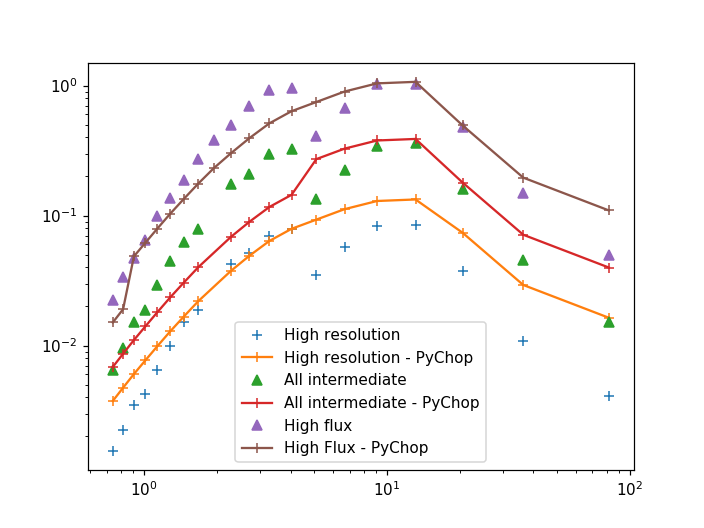

In [91]:
plt.figure()

scale_factor = 7e-6

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.intensity)
plt.loglog(x,y, '+', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[1][0]*scale_factor*deteff(_)*absorption(_) 
            for _ in x]
plt.loglog(x,y_pychop, '+-', label='High resolution - PyChop')

x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.intensity)
plt.loglog( x,y, '^', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=240.)[1][0]*scale_factor*deteff(_)*absorption(_)
            for _ in x]
plt.loglog(x,y_pychop, '+-', label='All intermediate - PyChop')

x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.intensity)
plt.loglog( x,y, '^', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=300.)[1][0]*scale_factor*deteff(_)*absorption(_)
            for _ in x]
plt.loglog(x,y_pychop, '+-', label='High Flux - PyChop')

plt.legend()

# Compare modes given Ei

# Resolution vs E transfer

## 1meV

In [26]:
Es = np.arange(-1, 1, 0.01)

In [27]:
instrument = PyChop2('cncs.yaml')
instrument.setChopper('High Resolution')
highres_res = instrument.getResolution(Etrans=Es, Ei_in=1., frequency=180.)
instrument.setChopper('Intermediate')
interm_res = instrument.getResolution(Etrans=Es, Ei_in=1., frequency=240.)
instrument.setChopper('High Flux')
highflux_res = instrument.getResolution(Etrans=Es, Ei_in=1., frequency=300.)

<IPython.core.display.Javascript object>


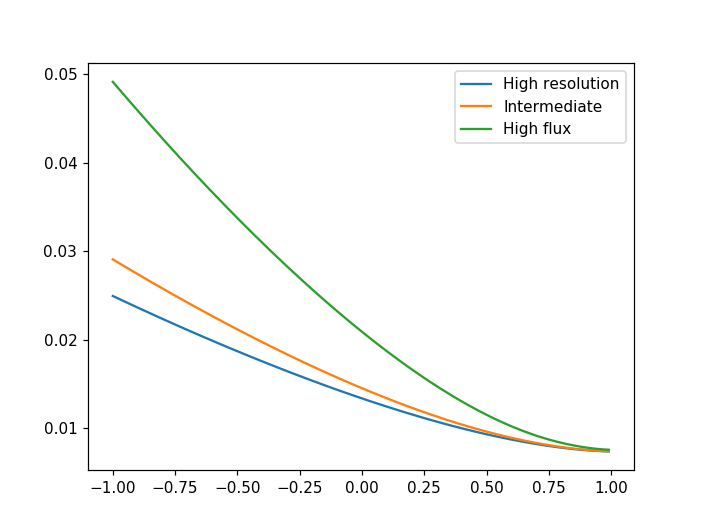

In [28]:
plt.figure()
plt.plot(Es, highres_res, label='High resolution')
plt.plot(Es, interm_res, label='Intermediate')
plt.plot(Es, highflux_res, label='High flux')
plt.legend()

In [66]:
header = '  '.join(['E', 'high_resolution', 'intermediate', 'high_flux'])
np.savetxt('res_vs_E-Ei_1meV.txt', np.array([Es, highres_res, interm_res, highflux_res]).T, header=header)

In [67]:
!head -n 5 ./res_vs_E-Ei_1meV.txt

# E  high_resolution  intermediate  high_flux
-1.000000000000000000e+00 2.542139647123919932e-02 2.946358079330619814e-02 4.934603835543201894e-02
-9.899999999999999911e-01 2.528084290721935995e-02 2.928806132046844410e-02 4.901282334110181743e-02
-9.799999999999999822e-01 2.514051110625939098e-02 2.911288575347598453e-02 4.868040455665038208e-02
-9.699999999999999734e-01 2.500040163399286017e-02 2.893805494252824073e-02 4.834878404222942710e-02


## 12meV

In [70]:
Es = np.arange(-12, 12, 0.1)
Ei = 12.

In [71]:
instrument = PyChop2('cncs.yaml')
instrument.setChopper('High Resolution')
highres_res = instrument.getResolution(Etrans=Es, Ei_in=Ei, frequency=180.)
instrument.setChopper('Intermediate')
interm_res = instrument.getResolution(Etrans=Es, Ei_in=Ei, frequency=240.)
instrument.setChopper('High Flux')
highflux_res = instrument.getResolution(Etrans=Es, Ei_in=Ei, frequency=300.)

<IPython.core.display.Javascript object>


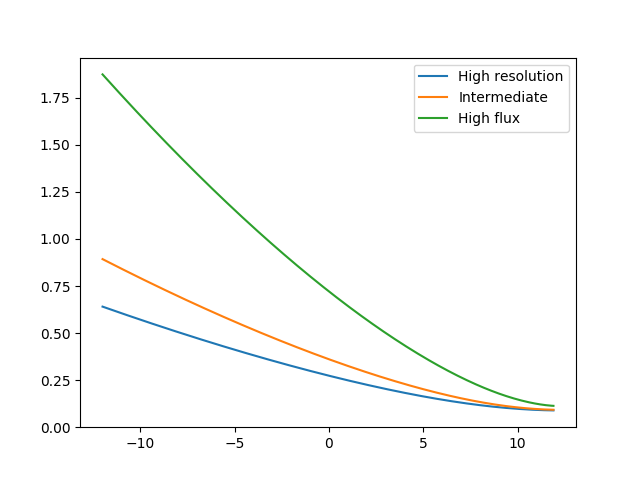

In [72]:
plt.figure()
plt.plot(Es, highres_res, label='High resolution')
plt.plot(Es, interm_res, label='Intermediate')
plt.plot(Es, highflux_res, label='High flux')
plt.legend()

In [73]:
header = '  '.join(['E', 'high_resolution', 'intermediate', 'high_flux'])
np.savetxt('res_vs_E-Ei_12meV.txt', np.array([Es, highres_res, interm_res, highflux_res]).T, header=header)

In [74]:
!head -n 5 ./res_vs_E-Ei_12meV.txt

# E  high_resolution  intermediate  high_flux
-1.200000000000000000e+01 6.410443784737406281e-01 8.930532084867353060e-01 1.872736341189423781e+00
-1.190000000000000036e+01 6.375245328785276167e-01 8.879300448026679060e-01 1.861618950085190738e+00
-1.180000000000000071e+01 6.340116520109816411e-01 8.828173713647803345e-01 1.850524713707998092e+00
-1.170000000000000107e+01 6.305057521249901598e-01 8.777152116723268005e-01 1.839453681510770267e+00
